# Linear regression with PyTorch

In [1]:
%matplotlib inline
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from typing import Callable
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [4]:
N_EPOCHS = 1_000
LEARNING_RATE = 1e-2

In [5]:
dataset = load_diabetes()
feature_names = dataset["feature_names"]

In [6]:
X = dataset["data"].astype(np.float32)
y = dataset["target"][:, np.newaxis].astype(np.float32)
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [7]:
w = torch.randn(1, len(feature_names), requires_grad=True)
b = torch.randn(1, requires_grad=True)

Using a simple model

In [8]:
def model(X: torch.Tensor):
    return X @ w.T + b

In [9]:
def mean_squared_error(y_true: torch.Tensor, y_preds: torch.Tensor):
    diff = y_preds - y_true
    return torch.sum(diff * diff) / diff.numel()

In [10]:
history = {"loss": []}
for i in range(N_EPOCHS):
    y_preds = model(X)
    loss = mean_squared_error(y, y_preds)
    loss.backward()
    history["loss"].append(loss.detach().numpy())
    with torch.no_grad():
        w -= w.grad * LEARNING_RATE
        b -= b.grad * LEARNING_RATE
        w.grad.zero_()
        b.grad.zero_()

Text(0, 0.5, 'Loss')

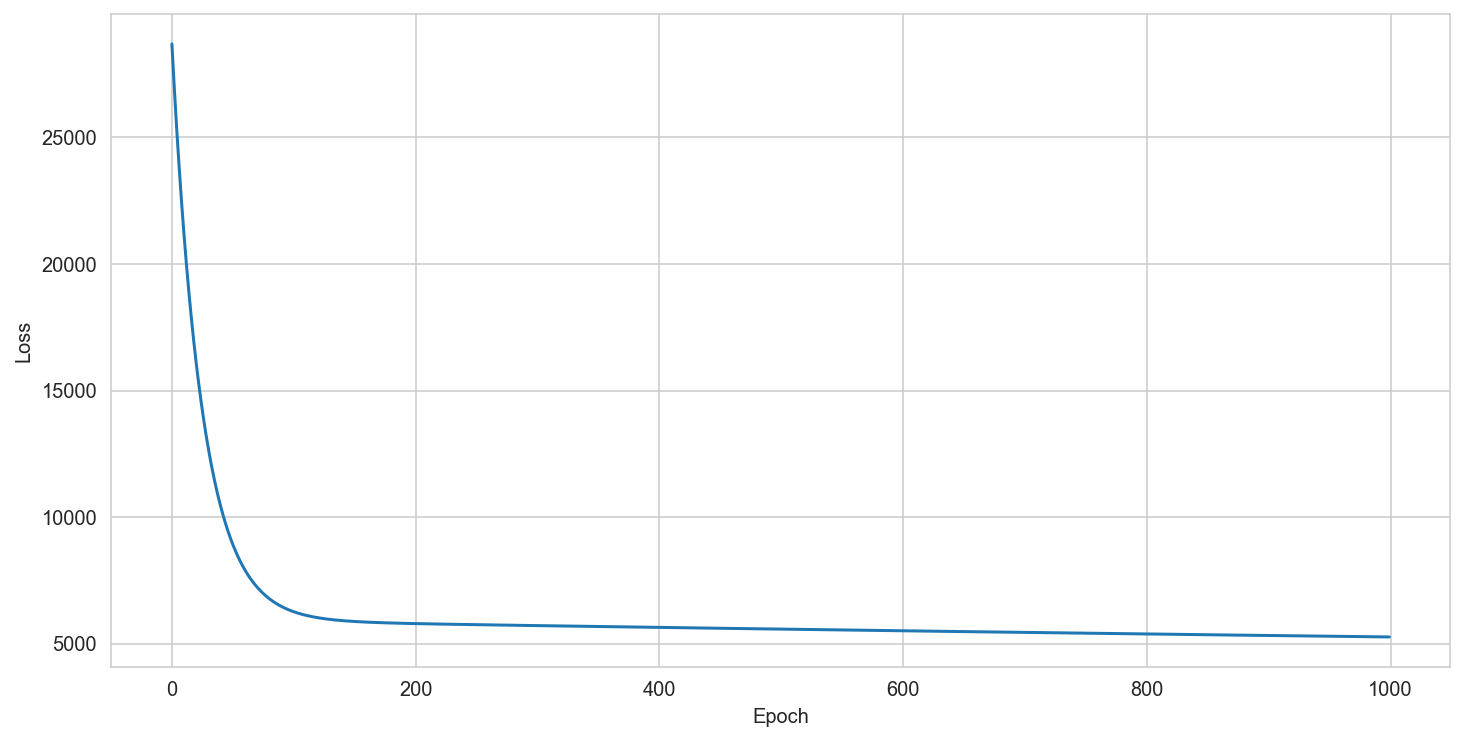

In [13]:
f, ax = plt.subplots(figsize=(12, 6))
sns.set_style("whitegrid")

ax.plot(np.arange(0, N_EPOCHS), history["loss"])
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

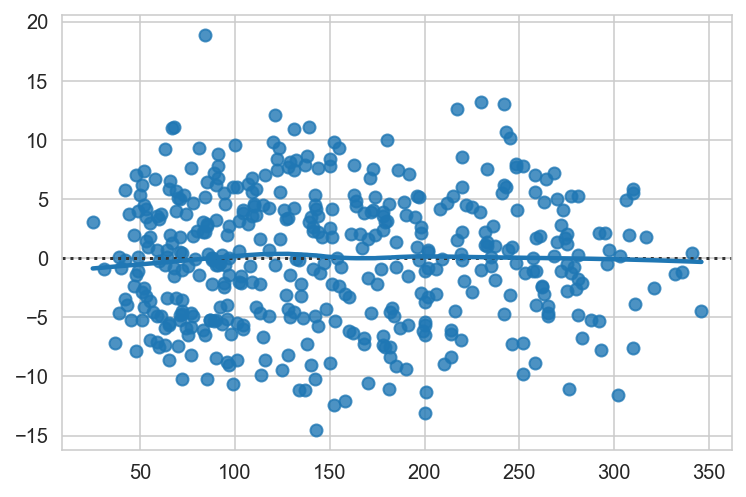

In [14]:
sns.set_style("whitegrid")

sns.residplot(y.detach().numpy(), y_preds.detach().numpy(), lowess=True)

---

# Using Torch's `nn.Linear` module

In [15]:
LEARNING_RATE = 1e-3
N_EPOCHS = 500
BATCH_SIZE = 128

In [16]:
X = dataset["data"].astype(np.float32)
y = dataset["target"][:, np.newaxis].astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [17]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [18]:
train_dl = DataLoader(train_dataset, BATCH_SIZE, shuffle=True)

In [19]:
model = nn.Linear(len(feature_names), 1)

In [20]:
opt = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
history = {"loss": []}
for i in range(N_EPOCHS):
    for Xb, yb in train_dl:
        yb_preds = model(Xb)
        loss = F.mse_loss(yb_preds, yb)
        loss.backward()
        opt.step()
        opt.zero_grad()
    _loss = loss.detach().numpy()
    history["loss"].append(_loss)
    print(f"Epoch: {i + 1}/{N_EPOCHS}, Loss: {_loss:.4f}\r", end="")

Text(0, 0.5, 'Loss')

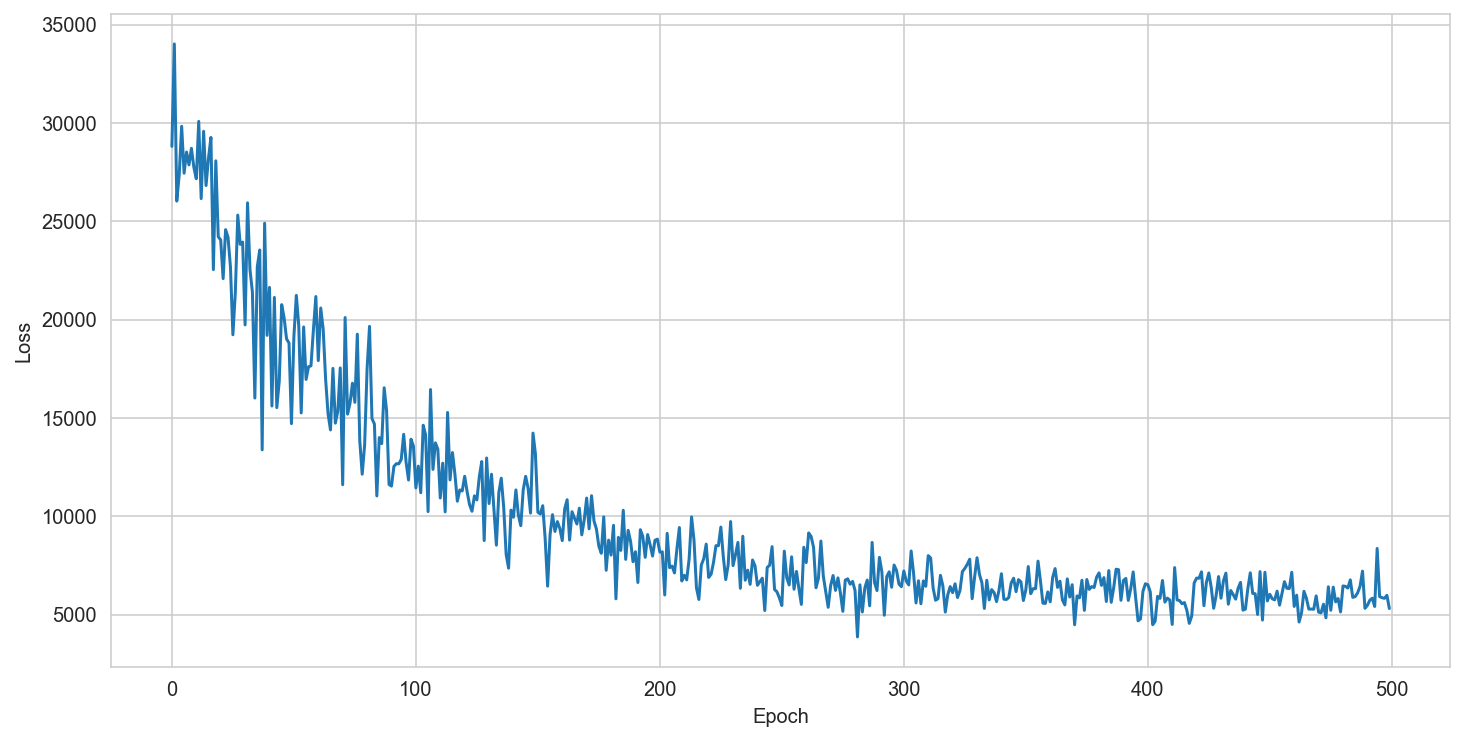

In [21]:
f, ax = plt.subplots(figsize=(12, 6))
sns.set_style("whitegrid")
ax.plot(np.arange(0, N_EPOCHS), history["loss"])
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")